In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Read the document 
xlsx_sheet = ["spacy-casEN", "Choices", "Sheet1", "Evaluation"]
df_sheets = pd.read_excel("ressources/2023-11-01_consensus_NER.xlsx", sheet_name=xlsx_sheet)

df = df_sheets["spacy-casEN"]
# Remove unnecessary colomn
col = ["titles", "h","desc"]
# df = df.drop(columns=col)


In [ ]:
#df.to_csv("Result/csv/NER_consensus.csv")
df.head()

,well recognized,well categorized,titles,h,NER_label,desc,method,hash,Index,Colonne1,Colonne2
0,1,1,L'héritage,bassin d'Arcachon,LOC,"héritage Christophe Perrin, un ostréiculteur r...",spacy,1,2,NaN,NaN
1,0,0,100 jours avec les dépanneurs de l'autoroute,�,MISC,alors ce 19 tonnes qui a été... � percuté de ...,spacy,7290,23715,NaN,NaN
2,0,0,La nouvelle vague,'',MISC,"du théâtre, du cinéma avec le magazine ''La no...",spacy,1598,4822,NaN,NaN
3,0,0,Phinéas et Ferb (S4-E22),- Retour,MISC,Candice se retrouve accidentellement changée e...,spacy,2790,10108,NaN,NaN
4,1,PERS,L'héritage,Tessa,LOC,Nathalie et Marianne aimeraient la vendre. Mai...,spacy,1,6,NaN,NaN


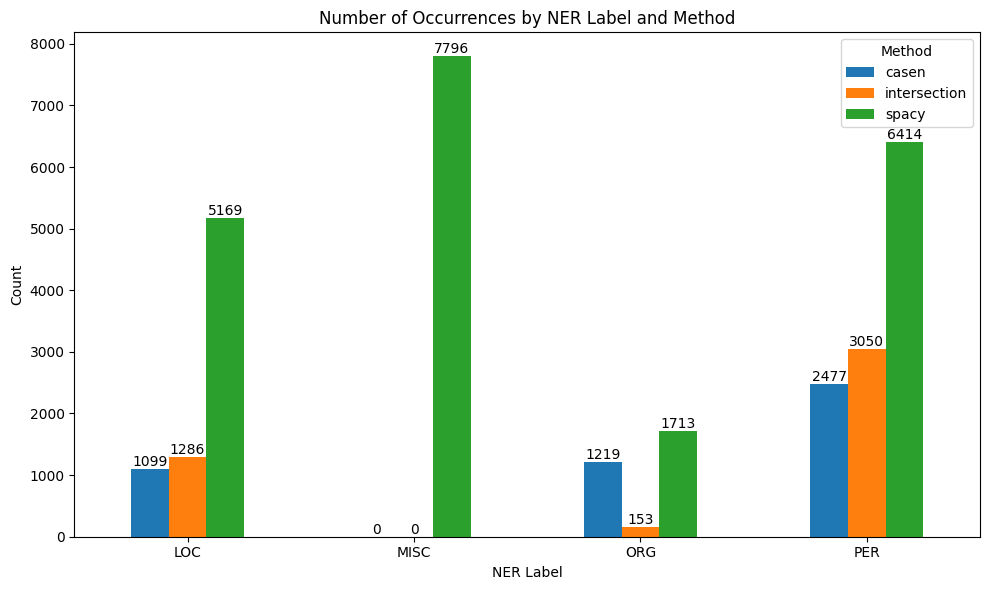

In [ ]:
def evaluate(df):

    NER_label = df["NER_label"].unique().tolist()
    NER_label = [label for label in NER_label if label not in [",", "", None]] # clean weard labels

    grouped = df.groupby(['NER_label', 'method']).size()

    counts = grouped.reset_index(name='count')
    counts['method'] = counts['method'].str.lower()
    pivot = counts.pivot(index='NER_label', columns='method', values='count')

    ax = pivot.plot(kind='bar', figsize=(10, 6))
    plt.title('Number of Occurrences by NER Label and Method')
    plt.ylabel('Count')
    plt.xlabel('NER Label')
    plt.xticks(rotation=0)
    plt.legend(title='Method')
    plt.tight_layout()

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10)

    plt.show()

evaluate(df)

In [50]:

def casen_vs_spacy(df, error_name="PERS", X_size=8, Y_size=6):
    """
        For every label, show the count of errors for spacy and casEN.
    """
    filtered_df = df[df["well categorized"] == error_name]

    grouped_df = filtered_df.groupby("method")
    
    counts = grouped_df.size()
    
    plt.figure(figsize=(X_size, Y_size))
    bars = plt.bar(counts.index, counts.values, color='skyblue')
    plt.xlabel("method", fontsize=12)
    plt.ylabel("Number of Occurrences", fontsize=12)
    plt.title(f"Number of error for : {error_name}", fontsize=14)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{int(height)}', ha='center', va='bottom', fontsize=12)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


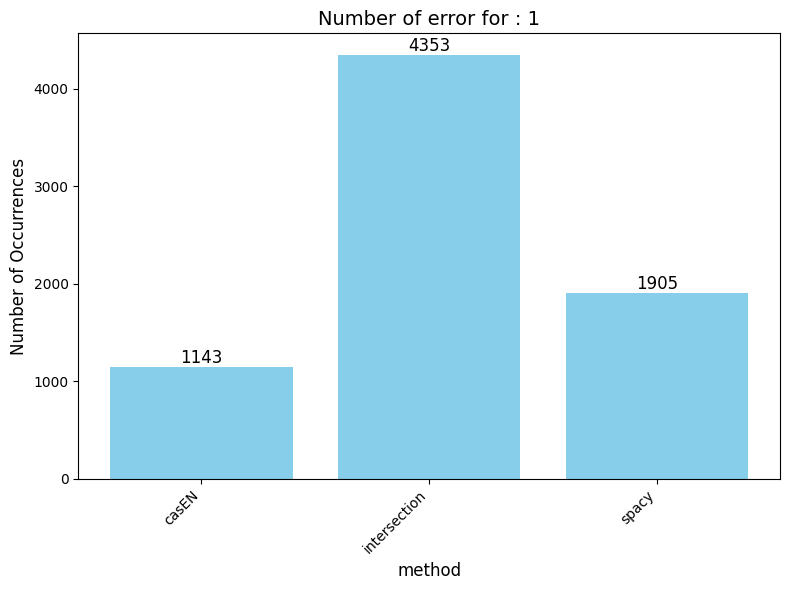

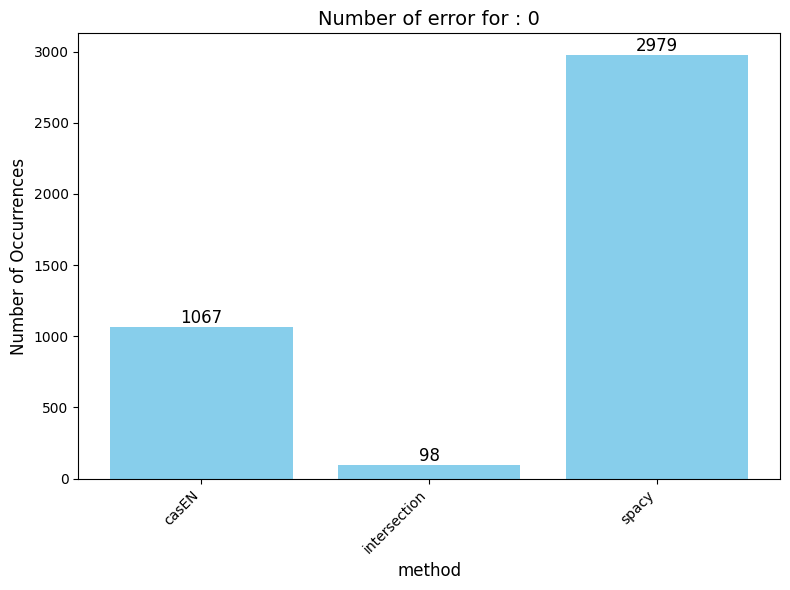

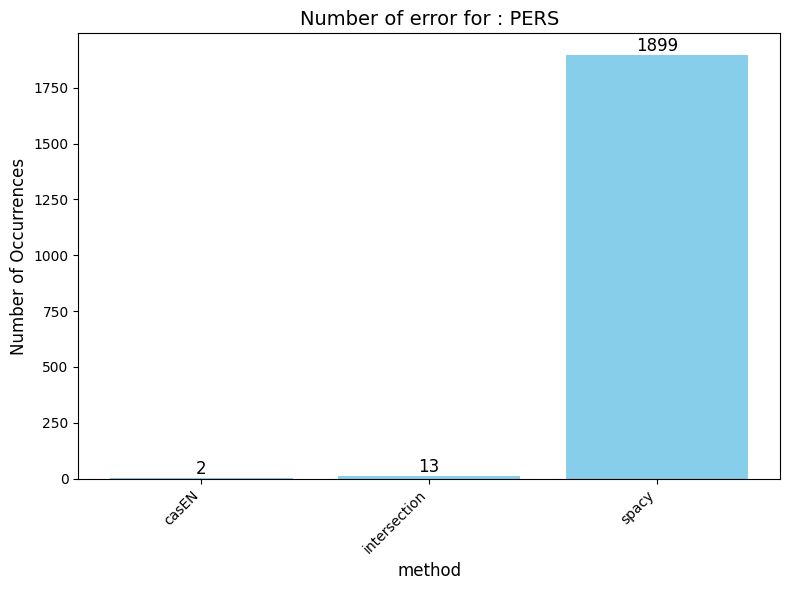

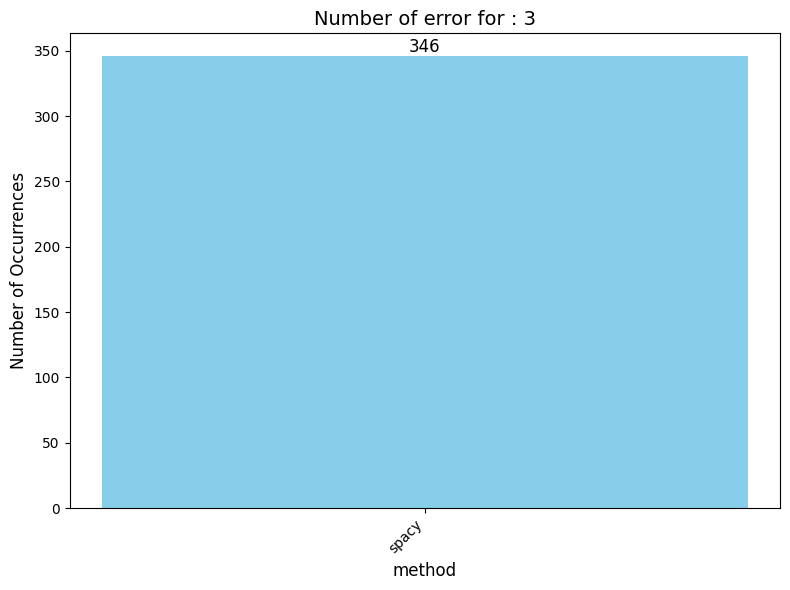

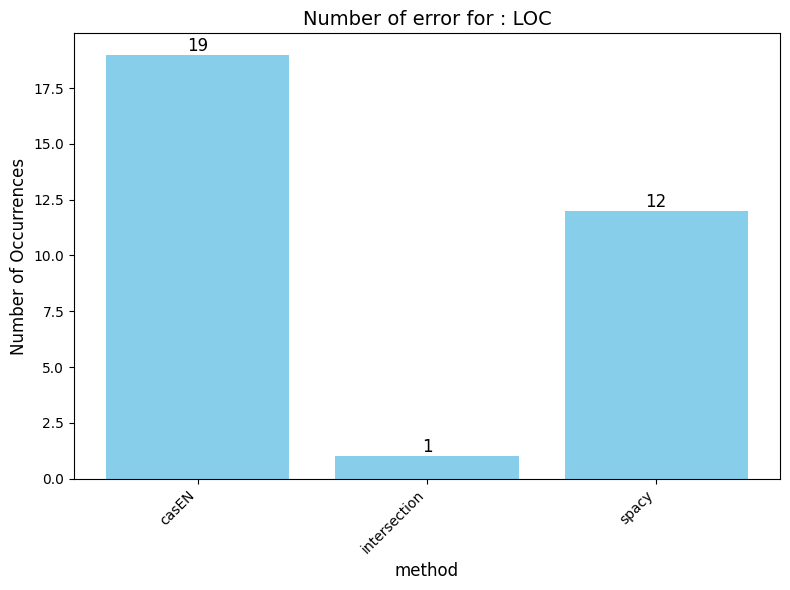

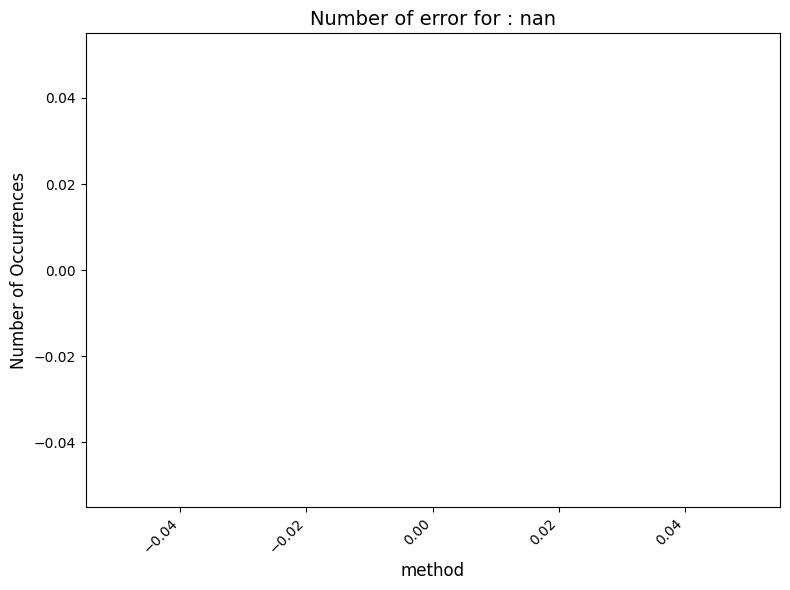

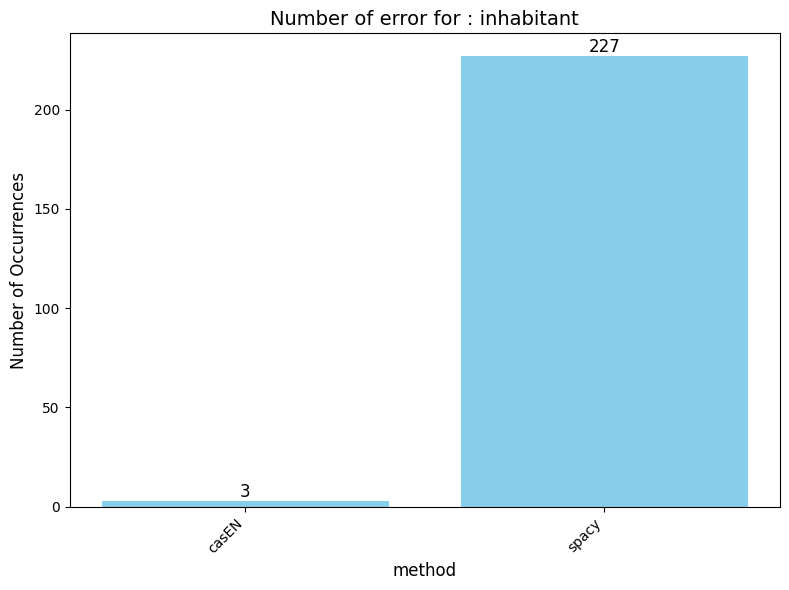

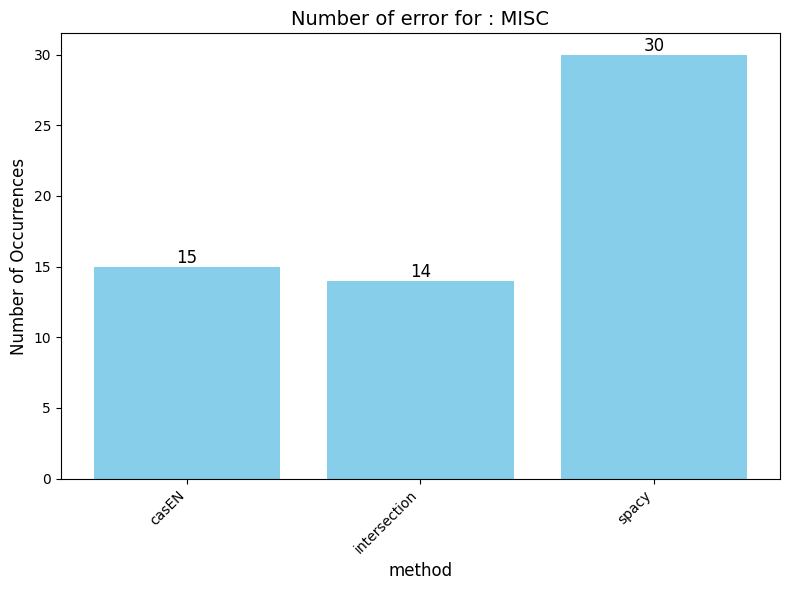

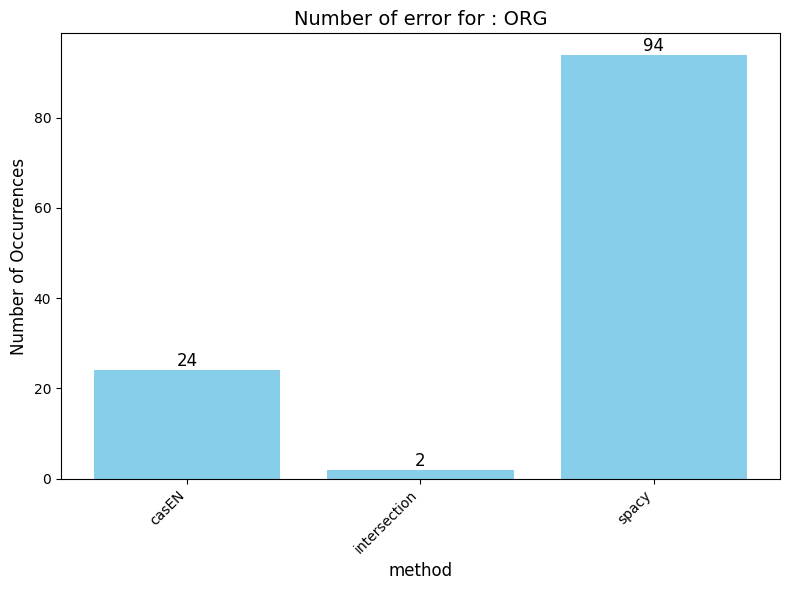

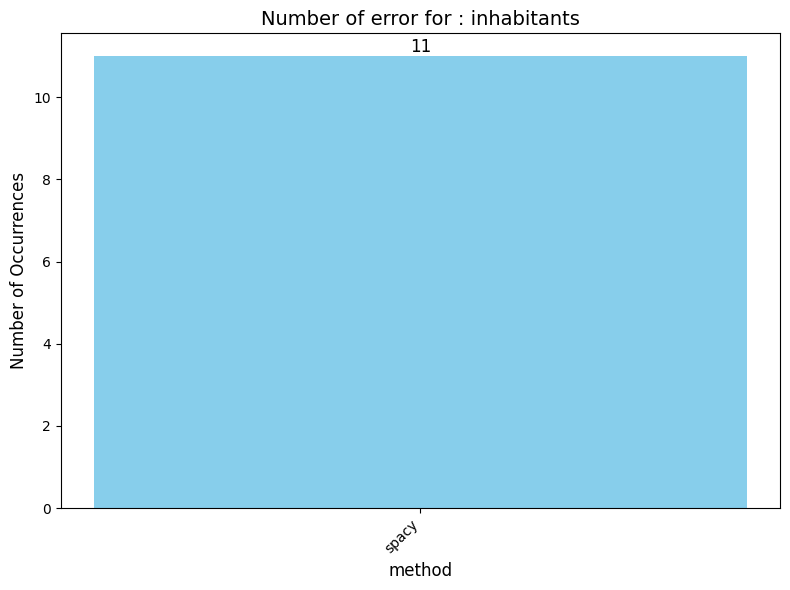

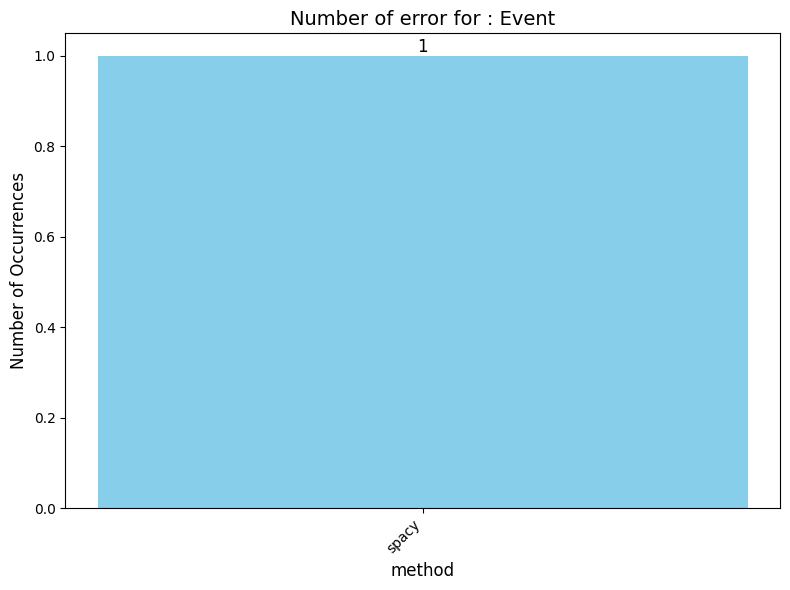

In [51]:
errors = df["well categorized"].unique().tolist()
for error in errors:
    casen_vs_spacy(df, error)